# PyROOT

What turns Python into pyroot is the inclusion of the ROOT libraries. That’s done with the
import command. Cut-and-paste the following into the first, then press SHIFT-ENTER. 

In [4]:
import ROOT

h = ROOT.TH1D("example","example histogram",100,-3,3)
h.FillRandom("gaus",10000)

Warning in <TROOT::Append>: Replacing existing TH1: example (Potential memory leak).


In [5]:
h.Fit("gaus", "S")

 FCN=117.602 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=4.47977e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.41471e+02   2.95131e+00   1.29166e-02  -2.99184e-06
   2  Mean        -1.60798e-02   9.99773e-03   5.31305e-05  -5.12033e-04
   3  Sigma        9.81826e-01   6.97500e-03   1.03315e-05  -8.17262e-04


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [6]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()

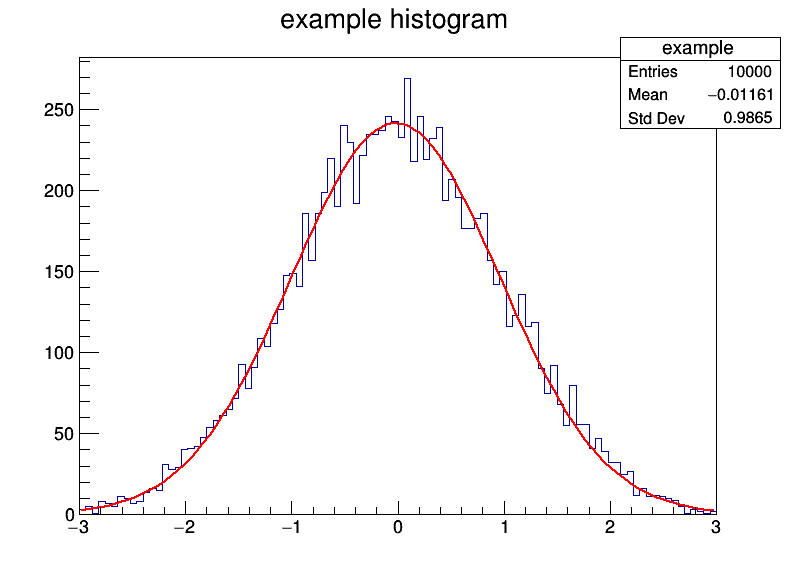

In [7]:
c.Draw()

It is not active by default yet, but Javascript visualisation can be activated for testing purposes. The plot below will be interactive: click on it and discover the JSROOT capabilities!

In [8]:
%jsroot on
c.Draw()

# Differences between C++ and Python

* C++ statements end with a semi-colon. 

```
[] myhist.FillRandom("gaus",10000); myhist.Fit("gaus");
```

* Python statements end with a RETURN; no semicolons.

```
In [] myhist.FillRandom("gaus",10000)
In [] myhist.Fit("gaus")
```

* C++ control structures (e.g., if statements, loops) are indicated by curly braces ({}).77 Any
indentation is for the convenience of humans; the compiler doesn’t need it:

```
for (Int_t jentry=0; jentry<nentries; jentry++) {
    Int_t ientry = LoadTree(jentry);
    // More stuff
}
std::cout << "The loop is over" << std::endl;
```

* Python control structures are defined by indentations. The indentation is mandatory; ending (or increasing) the indentation is the same as ending (or nesting) the structure. This means that when you start working with pyroot scripts, you must be careful with the TAB and SPACE keys. Note the colon at the end of the for statement; colons are also needed at the end of if statements:

```
for jentry in xrange( entries ):
    # get the next tree in the chain and verify
    ientry = mychain.LoadTree( jentry )
    # More stuff
print "The loop is over`
```

* C++ uses pointers, and ROOT makes liberal use of them in the code it generates for you (in .C files, etc.). 

```
[] TH1* hist = new TH1D("example","my second histogram",100,-3,3);
[] hist->FillRandom("gaus")`
```

* Python does not use pointers, which means you don’t have to remember whether to use "." or "->"`

```
In [] hist = ROOT.TH1D("example","my second histogram",100,-3,3)
In [] hist.FillRandom("gaus")
```

* You have might picked up on this from the examples above: C++ has strict rules about types, and expects you to specify them when you create a new variable.

```
[] Double_t x = 2 * 3;
[] TH1D yae = TH1D("test4","yet another example",200,-100,100);
```

* Python determines typesdynamically, and you don't have to specify them:

```
In [] x = 2*3
In [] yae = ROOT.TH1D("test4","yet another example",200,-100,100)
```

* Finally, the ROOT C++ interpreter, cling, knows the names of all the ROOT classes.

```
[] TH1D* example4 = new TH1D("example4","my fourth histogram",100,-3,3);
[] example4.Draw();
```

* In Python, you have to explicitly load ROOT, and then indicate that a class is part of ROOT. There are two ways to do thisThere are two ways to do this:

```
Method 1: Import all of ROOT, and indicate which classes are part of ROOT with a prefix:

In [] import ROOT
In [] example4 = ROOT.TH1D("example4","my fourth histogram",100,-3,3)
In [] example4.Draw()
```


```
Method 2: Import the classes you'll need explicitly so you can omit the prefix:

In [] from ROOT import TH1D
In [] example4 = TH1D("example4","my fourth histogram",100,-3,3)
In [] example4.Draw()
```

If you use the second method, be aware that if you add a new ROOT class to your Python script
(e.g., TCanvas), you'll have to add it to your import list:
```
In [] from ROOT import TH1D, TCanvas
```


## Interleave Python with C++: the ```%cpp``` magic

Thanks to ROOT, it is possibile to write cells in C++ within a Python notebook. This can be done using the %%cpp magic. Magics are a feature of Jupyter notebooks and when importing the ROOT module, the %%cpp magic was registered.

In [9]:
%%cpp
cout << "This is a C++ cell" << endl;

This is a C++ cell


Not bad. On the other hand, ROOT offers much more than this. Thanks to its type system, entities such as functions, classes and variables, created in a C++ cell, can be accessed from within Python.

In [10]:
%%cpp
class A{
    public:
    A(){cout << "Constructor of A!" << endl;}
};

In [11]:
a = ROOT.A()

Constructor of A!


# Simple Analysis using Draw command

You can perform an analysis using the Draw command, the TreeViewer, the FitPanel and other simple techniques discussed in the
previous class.


In [12]:
myFile = ROOT.TFile("files/experiment.root")
tree1 = ROOT.gROOT.FindObject("tree1")

The first command imports specific ROOT classes into Python. 
The third command means: look through everything we've read in (the "everything" is gROOT) and 
find the object whose name is "tree1".

In the notebook, you can't use the Scan methos to look at the contents of the Trre, but you can display the names of the variables and the size of the TTree:

In [13]:
tree1.Print()

******************************************************************************
*Tree    :tree1     : Reconstruction ntuple                                  *
*Entries :   100000 : Total =         2810761 bytes  File  Size =    2171135 *
*        :          : Tree compression factor =   1.30                       *
******************************************************************************
*Br    0 :event     : event/I                                                *
*Entries :   100000 : Total  Size=     401519 bytes  File Size  =     134514 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=   2.85     *
*............................................................................*
*Br    1 :ebeam     : ebeam/F                                                *
*Entries :   100000 : Total  Size=     401519 bytes  File Size  =     260330 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=   1.47     *
*...................................................

You can see that the variables stored in the TTree are ```event, beam, px, py, pz, chi2```
Create a histogram of one of the variables. For example:

In [14]:
my_canvas = ROOT.TCanvas()
tree1.Draw("ebeam")
my_canvas.Draw()

Using the Draw commands, make histograms of the other variables.
Instead of just plotting a single variable, let's try plotting two variables at once:

In [15]:
tree1.Draw("ebeam:px")
my_canvas.Draw()

This is a scatterplot, a handy way of observing the correlations between two variables.
The Draw command interprets the variables as ("y:x") to decide which axes to use.

It's easy to fall into the trap of thinking that each (x,y) point on a scatterplot represents two values in your n-tuple.
The scatterplot is a grid; each square in the grid is randomly populated with a density of dots proportional to the number of values in that square.

Try making scatterplots of different pairs of variables. Do you see any correlations?

If you see a shapeless blob on the scatterplot, the variables are likely to be uncorrelated; for example, plot ```px``` versus ```py```. If you see a pattern, there may be a correlation; for example, plot ```pz```versus ```zv```. It appears that the higher ```pz```is, the lower ```zv```is, and vice versa. Perhaps the particle loses energy before it is deflected in the target.

Let's create a "cut" (a limit on the range of a variable):

In [16]:
tree1.Draw("zv", "zv < 20")
my_canvas.Draw()

Look at the x-axis of the histogram and compare with the previous one. Note that ROOT determines an appropriate range for the x-axis of your histogram.

A variable in a cut does not have to be one of the variables your're plotting:

In [17]:
tree1.Draw("ebeam", "zv < 20")
my_canvas.Draw()

ROOT's symbol for logical AND is &&.

In [18]:
tree1.Draw("ebeam", "px > 10 && zv < 20")
my_canvas.Draw()

# Using Python to analyze a Tree

In ROOT/C++ there's a method (MakeSelector) that can create a macro for you from a TTree or n-tuple. In Pyroot there's no direct equivalent. However, the "analysis skeleton" for a n-tuple is much simpler in Python.

Most analysis tasks have the following steps:
* Set-up: open files, define variables, create histograms, etc.
* Loop: for each event in the n-tuple or Tree, perform some tasks: calculate values, apply cuts, fill histograms, etc.
* Wrap-up: display results, save histograms, etc.

The Python code from Analyze.py is below. I've markes the places in the code where you'd place your own commands for Set-up, Loop and Wrap-up:

```
from ROOT import TFile, gDirectory
# You probably also want to import TH1D and TCanvas
# unless you're not drawing any histograms.
from ROOT import TH1D, TCanvas
# Open the file. Note that the name of your file outside this class
# will probably NOT be experiment.root.
myfile = TFile( 'files/experiment.root' )
# Retrieve the n-tuple of interest. In this case, the n-tuple's name is
# "tree1". You may have to use the TBrowser to find the name of the
# n-tuple that someone gives you.
mychain = gDirectory.Get( 'tree1' )
entries = mychain.GetEntriesFast()
### The Set-up code goes here.
###
for jentry in xrange( entries ):
   # Copy next entry into memory and verify.
   nb = mychain.GetEntry( jentry )
   if nb <= 0:
   continue
   # Use the values directly from the tree. This is an example using a
   # variable "vertex". This variable does not exist in the example
   # n-tuple experiment.root, to force you to think about what you're
   # doing.
   # myValue = mychain.vertex
   # myHist.Fill(myValue)
   ### The Loop code goes here.
   ###

### The Wrap-up code goes here
###
```

In Python, "flow control" (loop, ```if``` statements, etc.) is indicated by identing statements. In C++, any indentation is optional and is for the convenience of humans. In Python the indentantio is mandatory and shows the scope of statements like ```if``` and ```for```.

Note that Loop and Wrap-up are distinguished by their indentation. this means that when you type in your own Loop and Wrap-up commands, they must have same indentation as the comments I put in.

Take a look at the code ```mychain.vertex```, which mean "get the current value of variable ```vertex```from the TTree in ```mychain```." This is an example; there's no variable ```vertex```in the n-tuple in experiment.root. If you want to know what variables are available, typically you'll have to examine the n-tuple/TTree in the TBrowser or display its structure with ```Print``` method.

# Using the Analyze script

As it stands, the Analyze script does nothing, but let's learn how to run it anyway.

Let's start making histograms. In the Set-up section, insert the following code:

```
chi2Hist = TH1D("chi2","Histogram of Chi2", 100, 0, 20)
```

In the Loop section, put this in:

```
chi2 = mychain.chi2
chi2Hist.Fill(chi2)
```

This goes in the Wrap-up section:

```
canvas = TCanvas()
chi2Hist.Draw()
canvas.Draw()
```

Don't forget about the indentation.

To run an external script from within a notebook cell, use the ```%run```magic command: ```%run Analyze.py```

You can save the contents of notebook cells by putting the ```%%writefile```cell magic command at the top of the cell and hitting SHIFT+ENTER, ```%%writefile AnalyzeChi2.py```

In [21]:
%run files/Analyze.py

In [20]:
myFile = ROOT.TFile("files/experiment.root")
tree1 = ROOT.gROOT.FindObject("tree1")
acanvas = ROOT.TCanvas()
tree1.Draw("chi2")
acanvas.Draw()

You can add the label in the axes by adding the following lines above to the Set-up section, right after the line that defines the histograms:

```
chi2Hist.GetXaxis().SetTitle("chi2")
chi2Hist.GetYaxis().SetTitle("number of events")
```

You can also use the magic ```%jsroot on```and then right-click on the axes, select ```Title->SetTitle```, and enter the axis label you want.

# Exercises

1. Revise the script to draw the ```chi2``` histogram with error bars.

2. Revise the scrip to create, fille and display an additional histogram of the variable ```ebeam```(with error bars and axis labels).

3. Fit the ```ebeam```histogram to a gaussian distribution.

4. Add another plot: a scatter plot of ```chi2```versus ```ebeam```. Don't forget to label the axes!

5. Calculate $p_T = \sqrt{p_x^2 + p_y^2}$   in an analysis macro and make a histogram of the variable. Tip: ```pt = sqrt(px*px + py*py)```

6. Include a histogram of the quantity ```theta```, or the angle that the beam makes with the z-axis, and is calculates by $\theta = arctan\left(\frac{p_T}{p_Z}\right)$. Tip: use this math function ```ROOT.TMath.ATan(y/x)```.

7. Apply a cut in your analysis macro. Your gooal is to count the number of events for which ```pz``` is less than 145 geV, and then display the value. Tip: include the following statement in your wrap-up section: ```print "The number of events with pz < 145 is", pzCount```

8. Revise your code to write the histograms to a file.